# GLBL 5010 - Assignment 1

In [183]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [184]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk2_accounting.csv?raw=true'
df = pd.read_csv(url, sep='\t')

In [185]:
alpha = 0.3

## Task 1a

$Y = AK^{0.3}L^{0.7}$

$\frac{Y}{L} = \frac{AK^{0.3}}{L}$

$y = Ak^{0.3}$

## Task 1b

In [186]:
# Calculate GDP per capita for 1960 and 2018, and compute growth rate

gdppc60 = df['cgdpo1960'] / df['pop1960']
gdppc18 = df['cgdpo2018'] / df['pop2018']

n = 2018-1960
g = np.log(gdppc18/gdppc60)/n

df['y1960'] = gdppc60
df['y2018'] = gdppc18
df['growth'] = g

In [187]:
# Set up the regression model

Y = df['growth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.816
Date:                Sat, 24 Jan 2026   Prob (F-statistic):              0.181
Time:                        15:24:26   Log-Likelihood:                 282.16
No. Observations:                 102   AIC:                            -560.3
Df Residuals:                     100   BIC:                            -555.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      0.013      3.198      0.0

The predicted average change in growth rate between 1960 and 2018 is -0.21% if a country's GDPPC in 1960 increased by one unit. As the slope is negative, the OLS signals possible convergence. However, the results are not significant.

## Task 1c

In [188]:
# Calculate capital per worker and total factor productivity for 1960 and 2018

df["k1960"] = df["cn1960"] / df["pop1960"]
df["k2018"] = df["cn2018"] / df["pop2018"]

df['A1960'] = df['y1960'] / df['k1960']**alpha
df['A2018'] = df['y2018'] / df['k2018']**alpha

In [189]:
# Take natural logarithms of relevant variables

df['lny1960'] = np.log(df['y1960'])
df['lnA1960'] = np.log(df['A1960'])
df['lnk1960'] = np.log(df['k1960'])

df['lny2018'] = np.log(df['y2018'])
df['lnA2018'] = np.log(df['A2018'])
df['lnk2018'] = np.log(df['k2018'])

In [190]:
# Display summary statistics for lnA1960

df['lnA1960'].describe()

count    102.000000
mean       5.366537
std        0.620780
min        3.187132
25%        4.916053
50%        5.388751
75%        5.826132
max        6.636096
Name: lnA1960, dtype: float64

## Task 1d

Text(0, 0.5, 'lny1960')

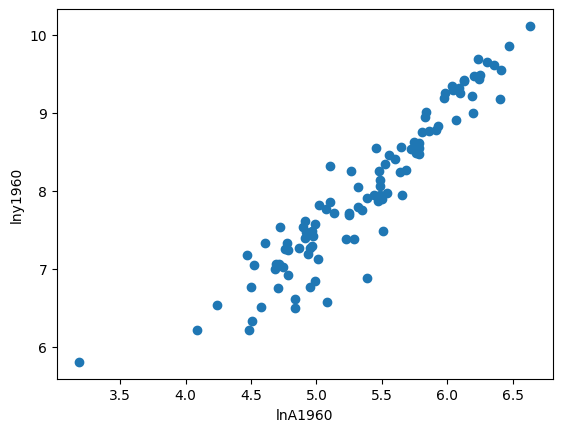

In [191]:
# Create scatter plot of lnA1960 vs lny1960

plt.scatter(df['lnA1960'], df['lny1960'])
plt.xlabel('lnA1960')
plt.ylabel('lny1960')

In [192]:
# Calculate Pearson correlation coefficient between lnA1960 and lny1960

correlation_matrix = np.corrcoef(df['lny1960'].dropna(), df['lnA1960'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9405769655007491


There is very strong correlation between countries' gdppc in 1960 and their TFP in 1960. This means that countries which had high levels of gdppc also had high levels of TFP and vice versa.

## Task 1e

In [193]:
# Compute hypothetical GDP per capita in 2018 if all countries had USA's TFP level

usa_tfp2018 = df.loc[df["countrycode"] == "USA", 'lnA2018'].values[0]
df['hypA2018'] = usa_tfp2018
df['hypy2018'] = df['hypA2018'] * df['k2018']**alpha
df['hypgrowth'] = np.log(df['hypy2018'] / df['y1960']) / n

In [197]:
# Display Argentina's hypothetical GDP per capita in 2018 and growth rate

print("Argentina:")
print("Hypothetical ln y: " + str(np.round(np.log(df.loc[df['countrycode'] == 'ARG', 'hypy2018']).values[0], 2)))
print("Hypothetical y: $" + str(np.round(df.loc[df['countrycode'] == 'ARG', 'hypy2018'].values[0], 2)))
print("Hypothetical growth rate: " + str(np.round(df.loc[df['countrycode'] == 'ARG', 'hypgrowth'].values[0], 2)))

Argentina:
Hypothetical ln y: 5.37
Hypothetical y: $213.98
Hypothetical growth rate: -0.05


In [196]:
df.style

,countrycode,country,pop1960,hc1960,cgdpo1960,cn1960,pop2018,hc2018,cgdpo2018,cn2018,region,y1960,y2018,growth,k1960,k2018,A1960,A2018,lny1960,lnA1960,lnk1960,lny2018,lnA2018,lnk2018,hypA2018,hypy2018,hypgrowth
0,AGO,Angola,nan,nan,nan,nan,30.809787,1.474635,233298,1360817.000000,Sub-Saharan Africa,nan,7572.204248,nan,nan,44168.335211,nan,305.977161,nan,nan,nan,8.932239,5.723510,10.695763,7.353961,181.992980,nan
1,ALB,Albania,nan,nan,nan,nan,2.882740,2.958068,35407,224225.000000,Europe & Central Asia,nan,12282.411872,nan,nan,77781.901941,nan,418.812938,nan,nan,nan,9.415924,6.037424,11.261664,7.353961,215.667594,nan
2,ARE,United Arab Emirates,nan,nan,nan,nan,9.630959,2.743402,630553,4396409.000000,Middle East & North Africa,nan,65471.465510,nan,nan,456487.147334,nan,1312.875355,nan,nan,nan,11.089370,7.179975,13.031316,7.353961,366.732917,nan
3,ARG,Argentina,20.545674,1.953866,65001.000000,107963.000000,44.361150,3.065968,1022236,3361087.000000,Latin America & Caribbean,3163.731694,23043.496393,0.034235,5254.780155,75766.453304,242.121458,791.963722,8.059508,5.489439,8.566893,10.045139,6.674516,11.235411,7.353961,213.975679,-0.046442
4,ARM,Armenia,nan,nan,nan,nan,2.951745,3.133220,40192,97055.130000,Europe & Central Asia,nan,13616.352361,nan,nan,32880.594360,nan,601.144508,nan,nan,nan,9.519027,6.398835,10.400638,7.353961,166.572469,nan
5,AUS,Australia,10.470019,2.746758,163815.000000,744405.700000,24.898152,3.536047,1350340,5795477.000000,East Asia & Pacific,15646.103412,54234.547207,0.021433,71098.791702,232767.355585,548.084513,1331.065407,9.657977,6.306429,11.171826,10.901073,7.193735,12.357795,7.353961,299.638730,-0.068197
6,AUT,Austria,7.093828,2.403941,71811.000000,176051.700000,8.891388,3.369997,470542,2835065.000000,Europe & Central Asia,10123.025255,52921.096234,0.028517,24817.587909,318855.166370,486.275568,1181.818528,9.222568,6.186775,10.119308,10.876557,7.074810,12.672492,7.353961,329.305788,-0.059062
7,BDI,Burundi,2.781159,1.095495,1920.000000,5961.864000,11.175374,1.402834,9048,18111.230000,Sub-Saharan Africa,690.359542,809.637333,0.002748,2143.661304,1620.637484,69.139858,88.182978,6.537213,4.236131,7.670271,6.696586,4.479414,7.390575,7.353961,67.519169,-0.040083
8,BEL,Belgium,9.113383,2.307354,94903.000000,493083.300000,11.482178,3.142735,510223,3436160.000000,Europe & Central Asia,10413.586832,44436.081726,0.025016,54105.410368,299260.297132,395.938865,1011.395521,9.250867,5.981260,10.898689,10.701807,6.919086,12.609069,7.353961,323.099330,-0.059878
9,BEN,Benin,2.284556,1.065200,3687.000000,3038.913000,11.485044,1.879319,35865,81024.510000,Sub-Saharan Africa,1613.880263,3122.756865,0.011381,1330.198457,7054.784466,186.507533,218.772660,7.386397,5.228472,7.193083,8.046472,5.388033,8.861461,7.353961,104.970303,-0.047116


## Task 1f

In [ ]:
# Set up the regression model for hypothetical growth

Y = df['hypgrowth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              hypgrowth   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     437.6
Date:                Sat, 24 Jan 2026   Prob (F-statistic):           2.64e-38
Time:                        14:23:44   Log-Likelihood:                 386.74
No. Observations:                 102   AIC:                            -769.5
Df Residuals:                     100   BIC:                            -764.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0450      0.004     10.016      0.0

Assuming the same levels of TFP in 2018 for all countries massively increases the R-squared of the OLS and significance of the coefficient (to the point where the p-value is lower than 0.000). 

## Task 2a

$Y = AK^{0.3}(HL)^{0.7}$

$\frac{Y}{L} = \frac{AK^{0.3}H^{0.7}}{L}$

$y = Ak^{0.3}H^{0.7}$

## Task 2b

In [153]:
df['y2018new'] = df['cgdpo2018'] / df['pop2018']
df['k2018new'] = df['cn2018'] / df['pop2018']
df['A2018new'] = df['y2018new'] / ((df['k2018new'] ** alpha) * df['hc2018']**(1 - alpha))

df['lny2018new'] = np.log(df['y2018new'])
df['lnk2018new'] = np.log(df['k2018new'])
df['lnA2018new'] = np.log(df['A2018new'])

In [154]:
df['lnA2018new'].describe()

count    142.000000
mean       5.534659
std        0.644604
min        3.906385
25%        5.060724
50%        5.549135
75%        6.024111
max        6.943093
Name: lnA2018new, dtype: float64

## Task 2c

Text(0, 0.5, 'lny2018')

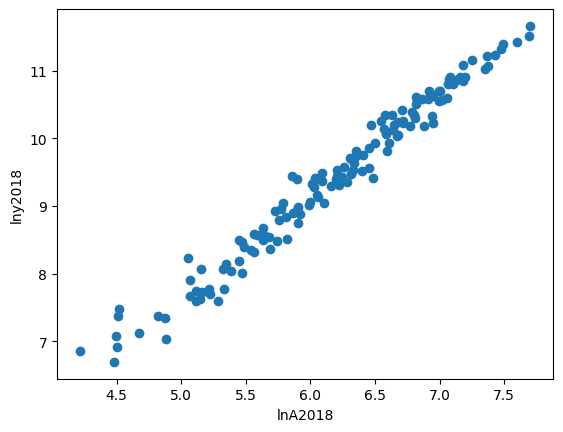

In [160]:
plt.scatter(df['lnA2018'], df['lny2018'])
plt.xlabel('lnA2018')
plt.ylabel('lny2018')

In [156]:
correlation_matrix = np.corrcoef(df['lny2018new'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9611858176665091


## Task 2d

Text(0, 0.5, 'lnA2018new')

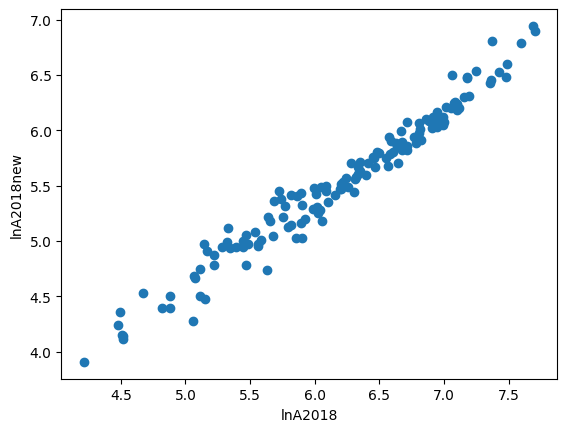

In [157]:
plt.scatter(df['lnA2018'], df['lnA2018new'])
plt.xlabel('lnA2018')
plt.ylabel('lnA2018new')

In [158]:
correlation_matrix = np.corrcoef(df['lnA2018'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9821181768687952
